## Import library!

In [782]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Import Neccessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

## Read Data

In [783]:
df=pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


## EDA

In [784]:
import pandas as pd
import numpy as np

def EDA(DF):
    df = DF.copy()
    print('The first thing you should do is explore your data: ')
    print(df.head().to_string())
    print('**************************************************************')

    print('Random sample of the data:')
    print(df.sample().to_string())
    print('**************************************************************')


    print('Column names:')
    print(df.columns)
    print('**************************************************************')

    print('Summary statistics:')
    print(df.describe().to_string())
    print('**************************************************************')

    for col in df.columns:
        print(f'\nChecking unique values and data type for column: {col}')
        print('Data type: {}'.format(df[col].dtype))
        print(f'Value counts:\n{df[col].value_counts()}')

    print('\nIf data types for each column are incorrect, you may need to use functions for data cleaning.')
    print('**************************************************************')


    print('Cleaning: Handling missing values and outliers')
    df = DF.copy()

    missing_cols = df.columns[df.isnull().any()]
    missing_value = df.columns[df.isnull().mean() > 0.5]

    null_percentage = df.isnull().mean()
    columns_to_drop = null_percentage[null_percentage > 0.5].index
    df.drop(columns=columns_to_drop, inplace=True)

    for col in missing_cols:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            if col in missing_value:
                df[col].fillna(df[col].mean(), inplace=True)

    numerical_cols = df.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        lower_threshold = df[col].mean() - 3 * df[col].std()
        upper_threshold = df[col].mean() + 3 * df[col].std()

        df[col] = np.where(df[col] < lower_threshold, lower_threshold, df[col])
        df[col] = np.where(df[col] > upper_threshold, upper_threshold, df[col])

    print('Your data is cleaned')

In [785]:
EDA(DF=df)

The first thing you should do is explore your data: 
   gender   age  hypertension  heart_disease smoking_history   bmi  HbA1c_level  blood_glucose_level  diabetes
0  Female 80.00             0              1           never 25.19         6.60                  140         0
1  Female 54.00             0              0         No Info 27.32         6.60                   80         0
2    Male 28.00             0              0           never 27.32         5.70                  158         0
3  Female 36.00             0              0         current 23.45         5.00                  155         0
4    Male 76.00             1              1         current 20.14         4.80                  155         0
**************************************************************
Random sample of the data:
       gender   age  hypertension  heart_disease smoking_history   bmi  HbA1c_level  blood_glucose_level  diabetes
27447  Female 25.00             0              0           never 22.35      

In [786]:
df.columns # Extract Columns name in your data sets

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [787]:
df.shape # Shape data set (Rows,Columns)

(100000, 9)

In [788]:
df.describe()  # Destrictive Statistics

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,41.89,0.07,0.04,27.32,5.53,138.06,0.09
std,22.52,0.26,0.19,6.64,1.07,40.71,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,60.00,0.00,0.00,29.58,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


In [789]:
df.info() # To define the data type for each columns and null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [790]:
df.dtypes # To define the data type for each columns

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

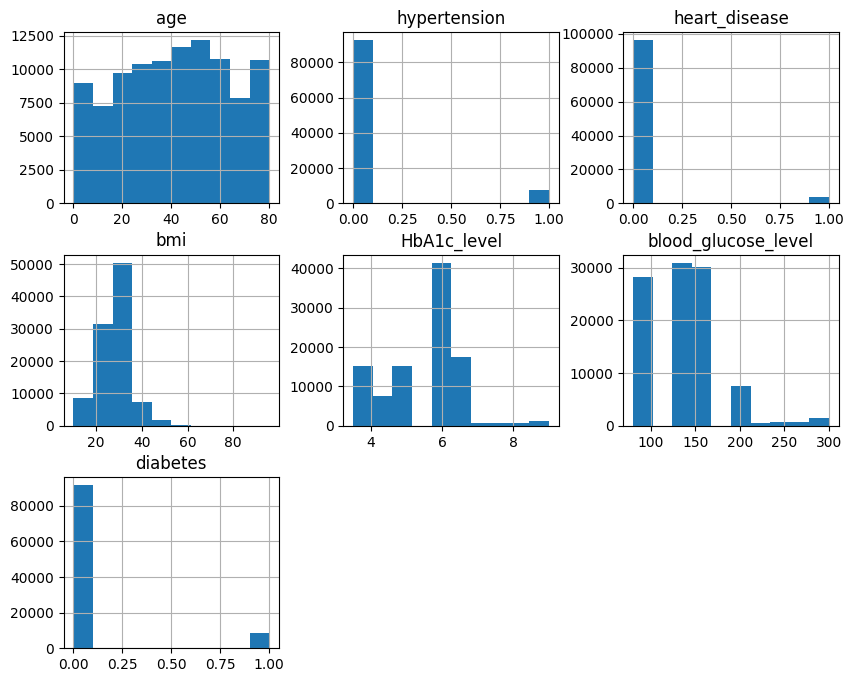

In [791]:
df.hist(figsize=(10,8)) # Visualizations distribution columns have a data type "Number "
plt.show()

In [792]:
df.gender.value_counts()  # define unique value and count of in data

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

## Data Cleaning

In [793]:
df.isnull().sum() # how count of null value in each columns

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [794]:
df.duplicated().sum()/len(df) # percentage of duplicated row by data

0.03854

## Drop_Duplicate

In [795]:
df=df.drop_duplicates()

In [796]:
print('Dupllicated',df.duplicated().sum()/len(df))
print('Shape of data after duplicated',df.shape)

Dupllicated 0.0
Shape of data after duplicated (96146, 9)


In [797]:
# Drop rows where 'gender' is 'Other'
df = df[df['gender'] != 'Other']

# Drop any remaining rows with missing values
df = df.dropna()

In [798]:
df = df[df['bmi'] <= 70]  # Filter of this columns value less than and equl " 70 "

In [799]:
df=df[df['age']>=10] # Filter of this columns value more than and equl " 10 "

In [800]:
print('Shape of data after Cleaning ',df.shape)
print('Count of rows are cleaned ', 100000- 86606)

Shape of data after Cleaning  (86606, 9)
Count of rows are cleaned  13394


## Questions??
### why blood_glucose_level >=200 and neutral with 70 to maximize 150

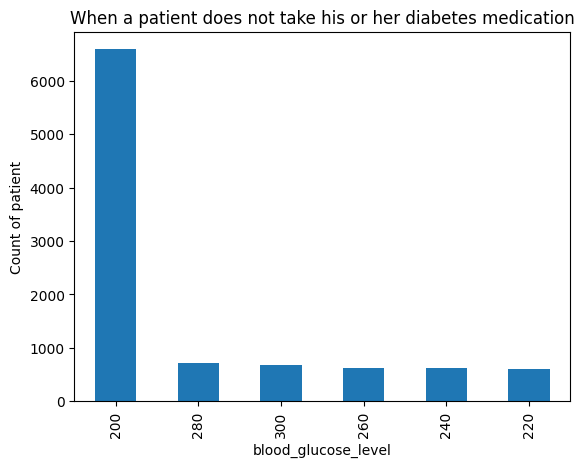

In [801]:
blood_glucose_level_above_200=df[df['blood_glucose_level']>=200]
blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar')
plt.title('When a patient does not take his or her diabetes medication')
plt.xlabel('blood_glucose_level')
plt.ylabel('Count of patient')
plt.show()

## Data Visalustion

In [802]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def visualize_and_cluster(df):
    # Plotting pairplot for numerical columns
    sns.pairplot(df.select_dtypes(include=[np.number]))
    plt.show()

    # Calculating correlation matrix
    correlation_matrix = df.corr()

    # Creating a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Plotting a heatmap of correlations
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask)
    plt.title("Correlation Heatmap")
    plt.show()

    # Identifying highly correlated pairs
    highly_correlated_pairs = np.where((correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1))
    high_corr_indices = list(zip(highly_correlated_pairs[0], highly_correlated_pairs[1]))

    # Creating visualizations for highly correlated pairs
    for i, j in high_corr_indices:
        col1, col2 = df.columns[i], df.columns[j]
        plt.figure(figsize=(10, 5))
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs {col2}')
        plt.show()

def vis(DF):
    df = DF.copy()

    for col in df.columns:
        if df[col].dtype == 'object':
            val_counts = df[col].value_counts()
            ax = val_counts.plot(kind='bar', title=f'Bar Plot for {col}')
            add_data_labels(ax)
            plt.show()
        else:
            ax = df[col].hist(figsize=(10, 8), bins=20, edgecolor='black')
            ax.set_title(f'Histogram for {col}')
            add_data_labels(ax)
            plt.show()

def add_data_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

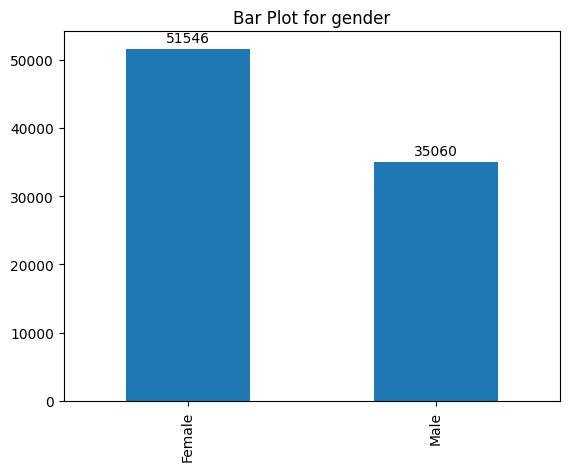

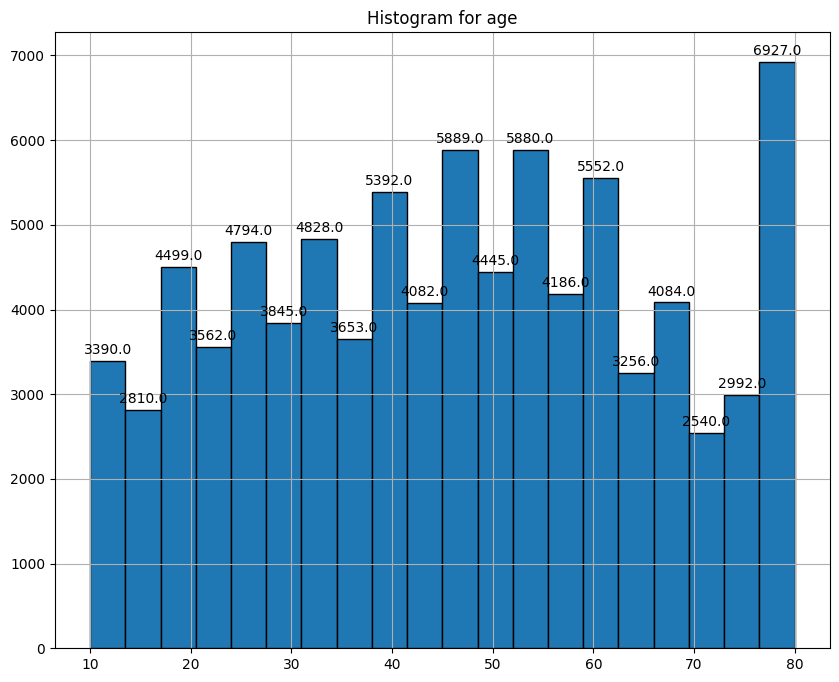

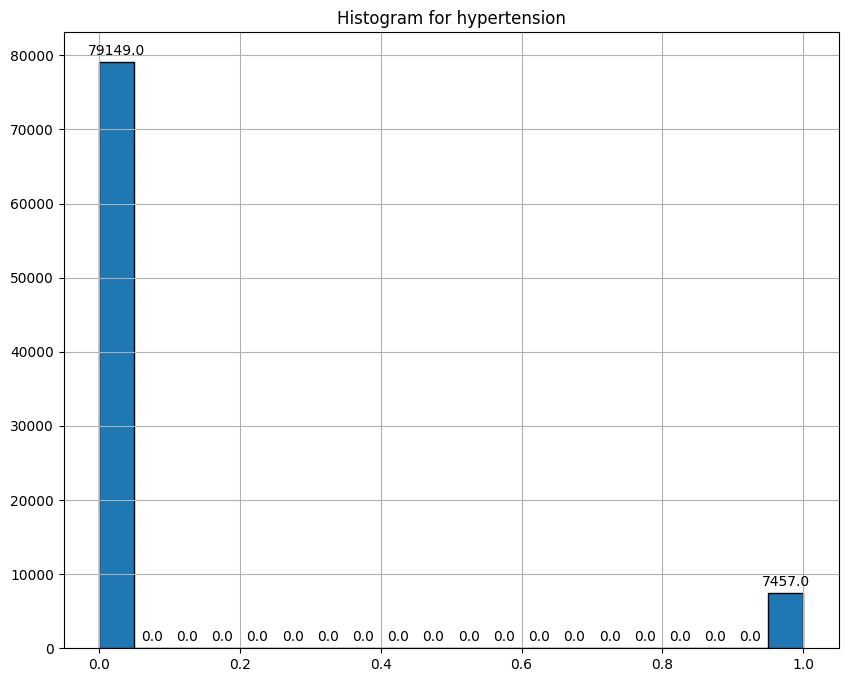

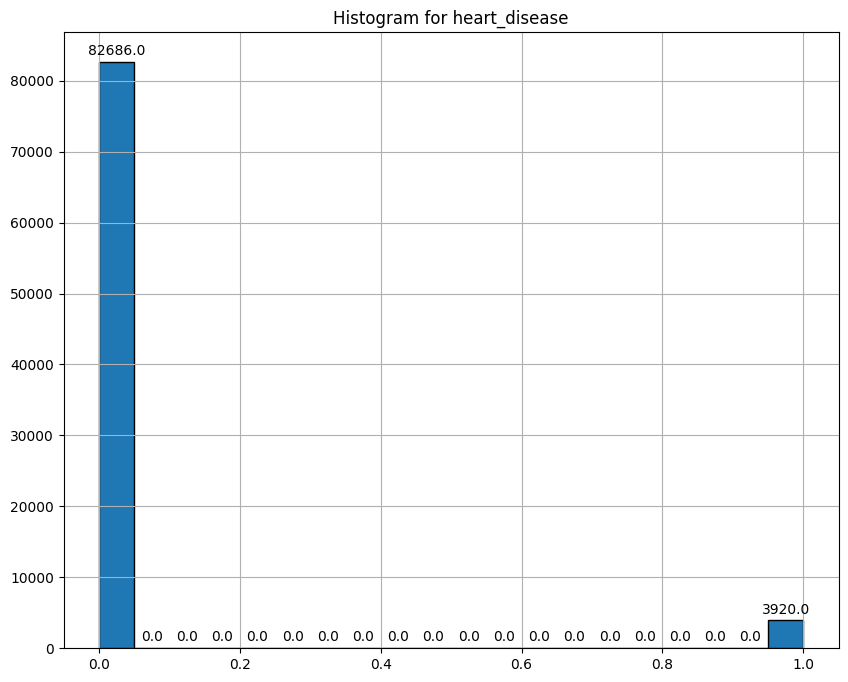

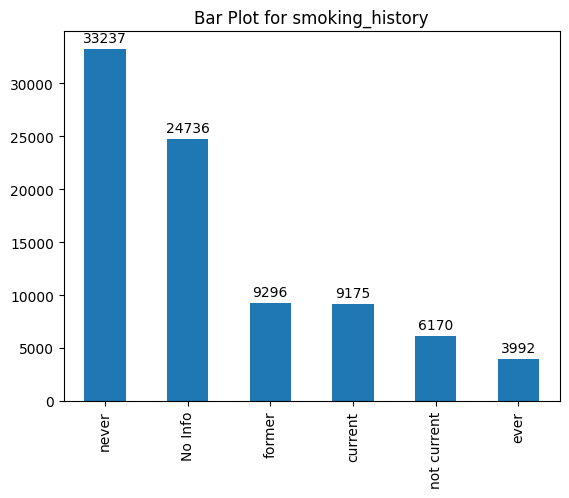

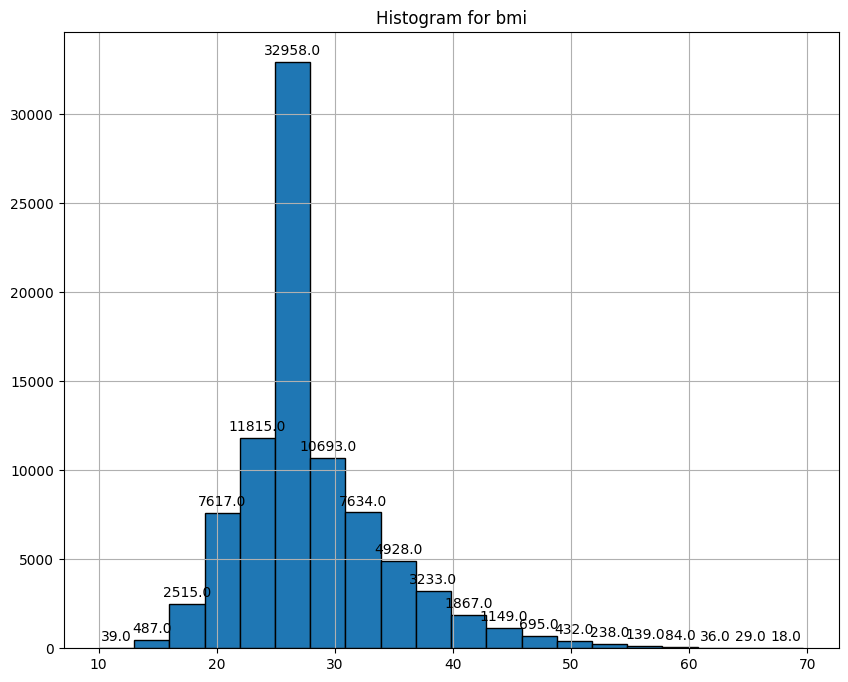

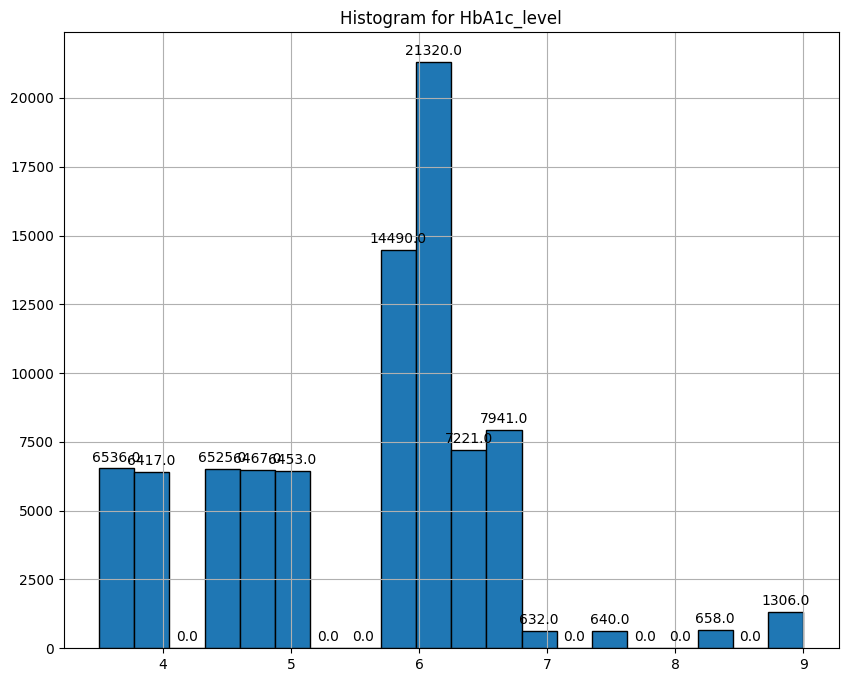

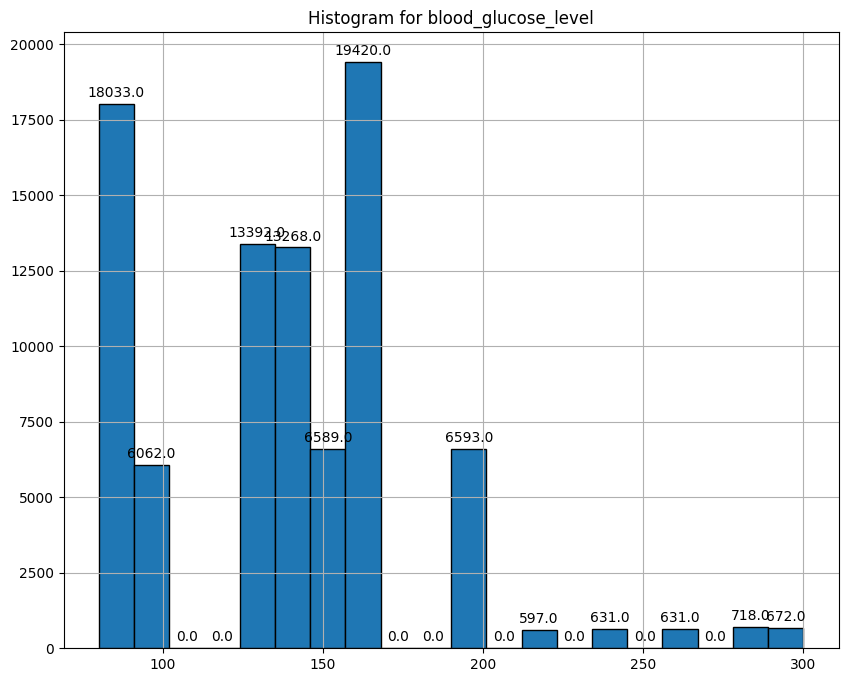

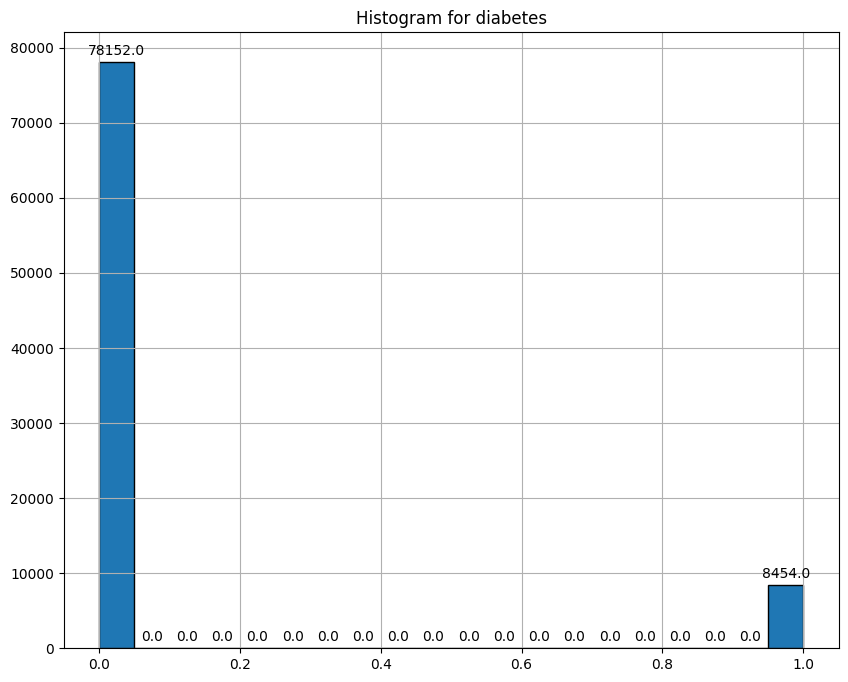

In [803]:
vis(DF=df)

In [804]:
# Create a donut chart to visualize the frequency of outcomes in the dataset
import plotly.express as px
outcome_freq = df['diabetes'].value_counts()
outcome_freq.index = ['Good', 'Diabetes']  # replace 0 and 1 with text labels
colors = ['#488A99', '#DADADA']
fig = px.pie(outcome_freq, values=outcome_freq.values, names=outcome_freq.index,
             hole=0.7, color=outcome_freq.index, color_discrete_sequence=colors)
fig.update_layout(title='Most people are not affected by diabetes.',
                  plot_bgcolor='#FFFFFF',
                  paper_bgcolor='#FFFFFF',
                  font_color='#333333',
                  title_font_size=24)
fig.update_traces(texttemplate='%{percent:.1%}', textposition='inside')
fig.show()

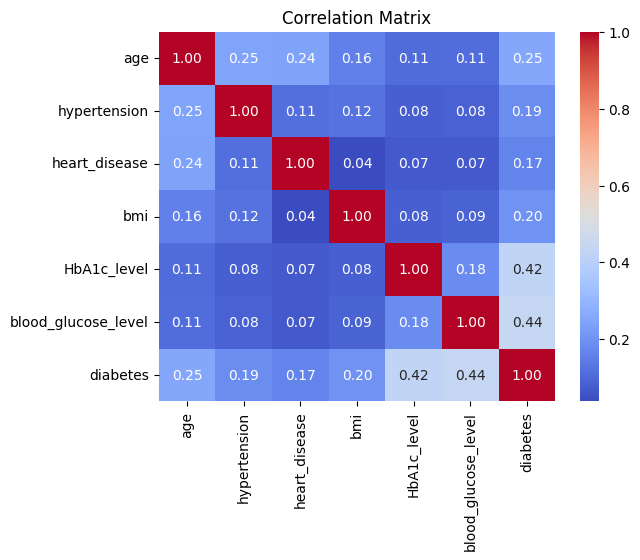

In [805]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

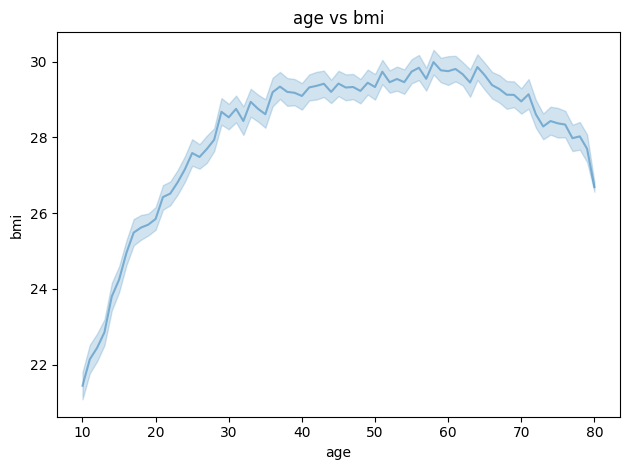

In [806]:
sns.lineplot(x='age', y='bmi', data=df, alpha=0.5)
plt.title('age vs bmi')
plt.tight_layout()
plt.show()

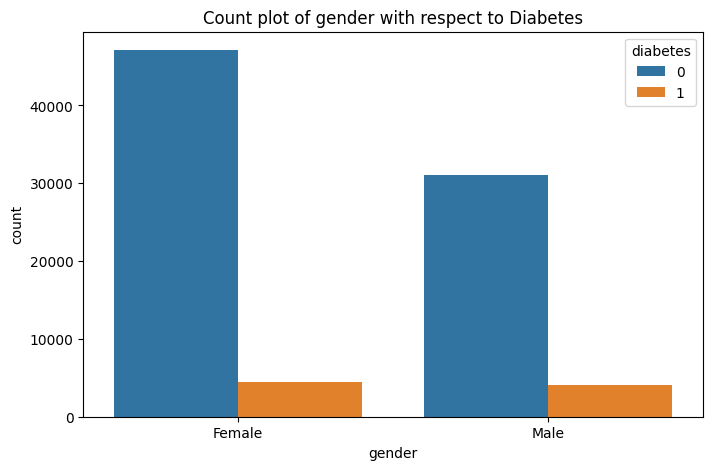

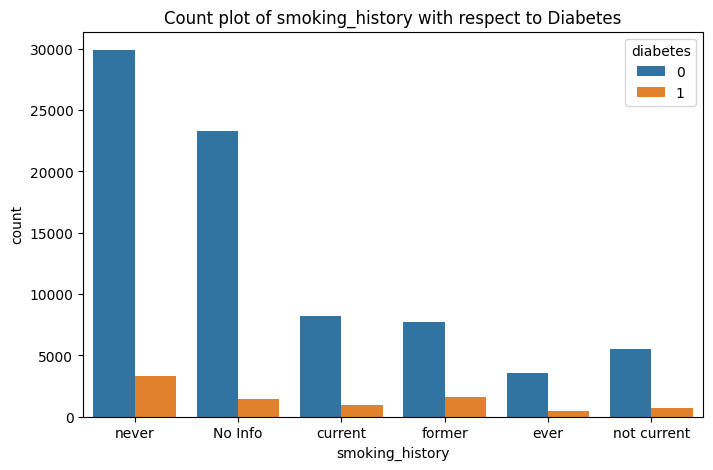

In [807]:
# Countplot for categorical variables
categorical_columns = ['gender','smoking_history']
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='diabetes', data=df)
    plt.title(f'Count plot of {column} with respect to Diabetes')
    plt.show()

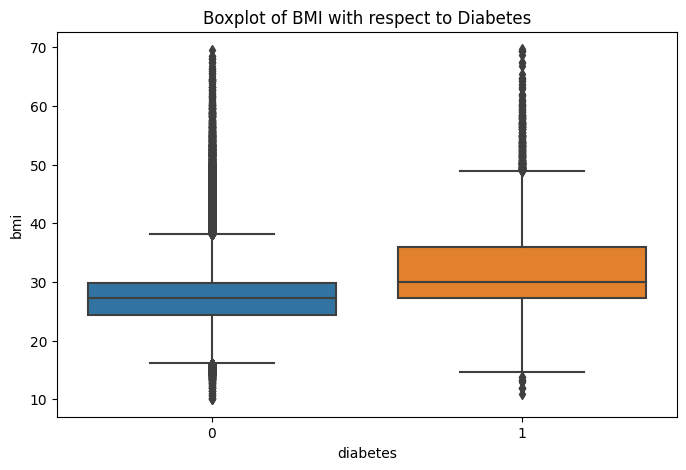

In [808]:
# Boxplot for BMI
plt.figure(figsize=(8, 5))
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('Boxplot of BMI with respect to Diabetes')
plt.show()

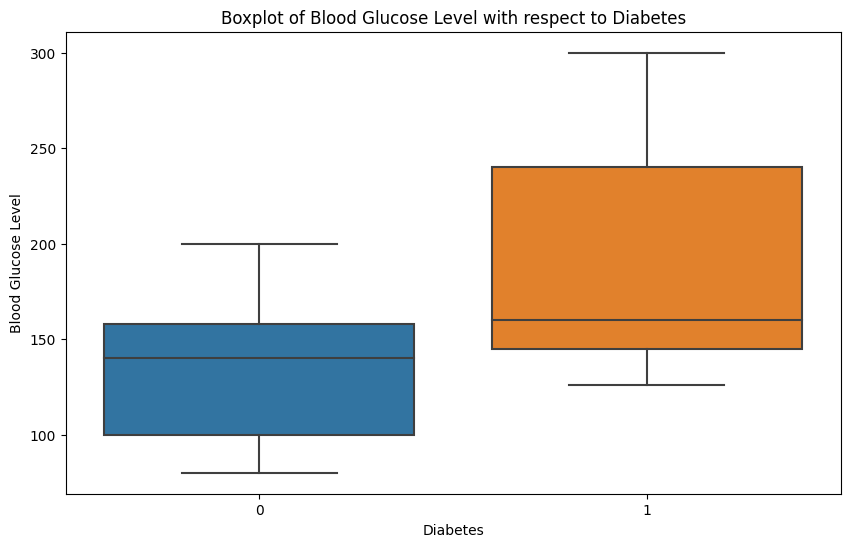

In [809]:
# Boxplot for Blood Glucose Level with respect to Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Boxplot of Blood Glucose Level with respect to Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

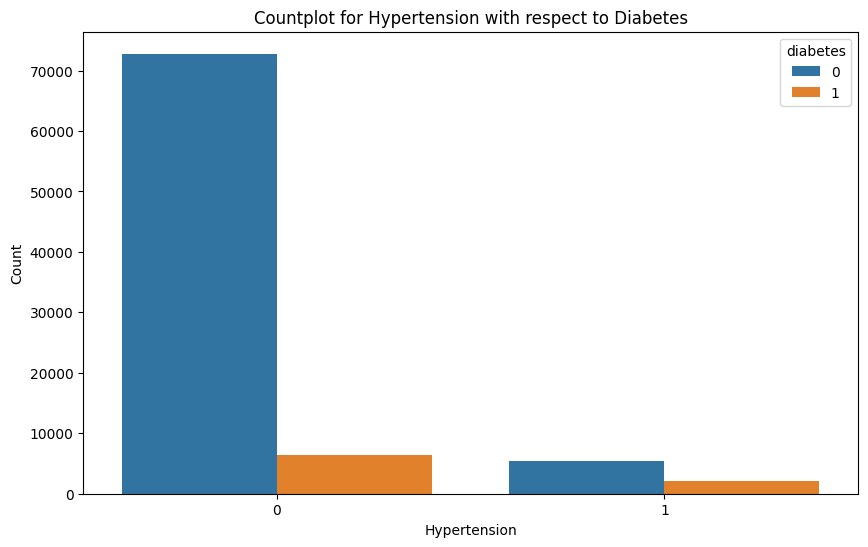

In [810]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hypertension', hue='diabetes', data=df)
plt.title('Countplot for Hypertension with respect to Diabetes')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [811]:
# Encode categorical variables using Label Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,MinMaxScaler
label_encoder = LabelEncoder()

In [812]:
df['gender'] = label_encoder.fit_transform(df['gender'])
df['smoking_history'] = label_encoder.fit_transform(df['smoking_history'])

### Balance Data

In [813]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns='diabetes').values
y = df['diabetes'].values

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the features and target variable for the training set
train_data = pd.concat([pd.DataFrame(X_train), pd.Series(y_train, name='target')], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['target'] == 0]
minority_class = train_data[train_data['target'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
balanced_data = pd.concat([majority_class, minority_upsampled])

# Separate features and target variable
X_balanced = balanced_data.drop('target', axis=1)
y_balanced = balanced_data['target']

# ***Gradient* Boosting Classifier**

In [814]:
# Train a model on the balanced training data
model = GradientBoostingClassifier(random_state=42)
model.fit(X_balanced, y_balanced)

GradientBoostingClassifier(random_state=42)

In [815]:

# Make predictions on the test set
y_pred = model.predict(X_test)

In [816]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [817]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9028980487241658
Confusion Matrix:
[[14124  1540]
 [  142  1516]]


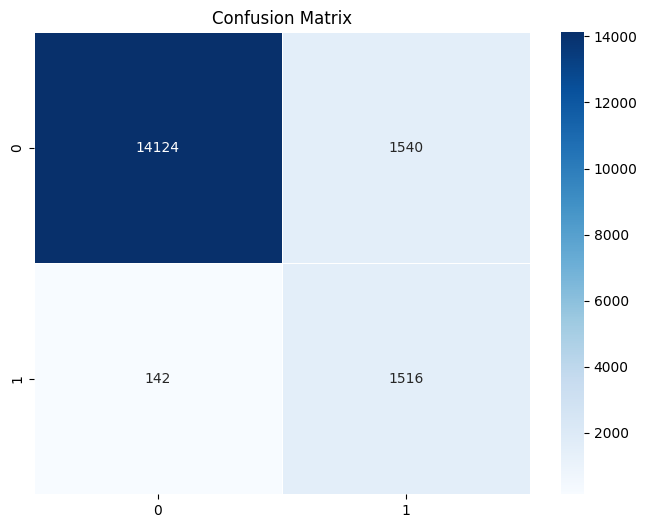

In [818]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=.5)
plt.title('Confusion Matrix')
plt.show()

In [819]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.49607329842931935
Recall: 0.9143546441495778


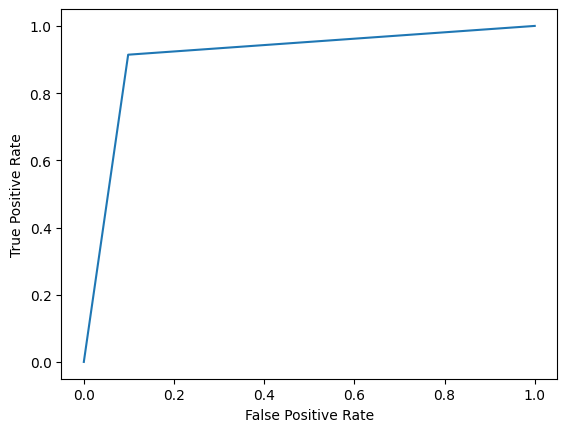

In [820]:
# Plot ROC curve
from sklearn.metrics import roc_curve, RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.show()


## Check of the over and under fiting in Gradient Boosting

In [821]:
print("Training Score:",model.score(X_train,y_train)*100,'%')

Training Score: 90.28491426591998 %


In [822]:
print("Testing Score:",model.score(X_test,y_test)*100,'%')

Testing Score: 90.28980487241658 %


In [823]:
new_data = pd.DataFrame({
    'gender': [0, 1, 0, 1, 0],
    'age': [55, 42, 30, 48, 35],
    'hypertension': [1, 0, 0, 1, 0],
    'heart_disease': [1, 0, 0, 0, 0],
    'smoking_history': [0, 1, 2, 3, 4],
    'bmi': [29.8, 23.5, 21.0, 32.1, 27.5],
    'HbA1c_level': [6.8, 5.3, 5.1, 6.0, 5.9],
    'blood_glucose_level': [130, 100, 95, 145, 115],
    'diabetes': [1, 0, 0, 1, 0]
})

# Drop the 'diabetes' column for prediction
X_new = new_data.drop(columns='diabetes')

predictions = model.predict(X_new)

# The 'predictions' variable now contains the predicted labels (0 or 1)
# 0 may indicate no diabetes, and 1 may indicate diabetes

for i in predictions:
    if i == 0:
        print('Happy! You do not have Diabetes.')
    else:
        print('Sad! You have Diabetes.')

Sad! You have Diabetes.
Happy! You do not have Diabetes.
Happy! You do not have Diabetes.
Sad! You have Diabetes.
Happy! You do not have Diabetes.


## Random Forest (Bagging )

In [824]:
random_f = RandomForestClassifier(random_state=42)

In [825]:
random_f.fit(X_balanced, y_balanced)

RandomForestClassifier(random_state=42)

In [826]:
# Make predictions on the test set
y_pred_rf = random_f.predict(X_test)

In [827]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Accuracy of Random Forest classifier: 0.9594735019050918
Confusion Matrix for Random Forest:
[[15438   226]
 [  476  1182]]


In [828]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
class_report = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest :")
print(class_report)

Classification Report for Random Forest :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     15664
           1       0.84      0.71      0.77      1658

    accuracy                           0.96     17322
   macro avg       0.90      0.85      0.87     17322
weighted avg       0.96      0.96      0.96     17322



 **Overfitting**

we have a perfect/close to perfect training set score while a poor test/validation score.

**underfitting**
In such cases, we see a low score on both the training set and test/validation set.

**Reasons behind overfitting:**
Using a complex model for a simple problem which picks up the noise from the data. Example: Fitting a neural network to the Iris dataset.
Small datasets, as the training set may not be a right representation of the universe.

**Reasons behind underfitting:**
Using a simple model for a complex problem which doesn’t learn all the patterns in the data. Example: Using a logistic regression for image classification
The underlying data has no inherent pattern. Example, trying to predict a student’s marks with his father’s weight.

## Thanks